In [6]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [10]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df = df.drop(['petal length (cm)', 'petal width (cm)'], axis='columns')
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


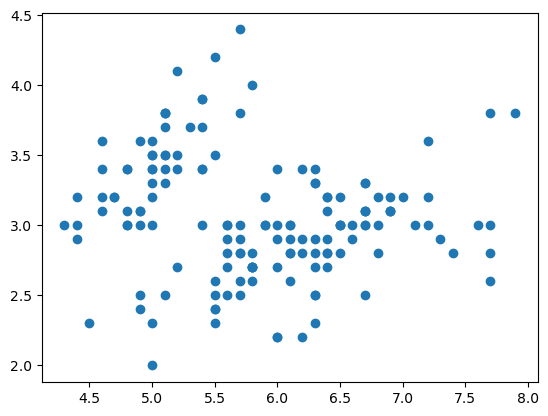

In [25]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

In [35]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [36]:
y_predicted = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])
y_predicted
df['cluster'] = y_predicted
df

C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,3
147,6.5,3.0,0
148,6.2,3.4,0


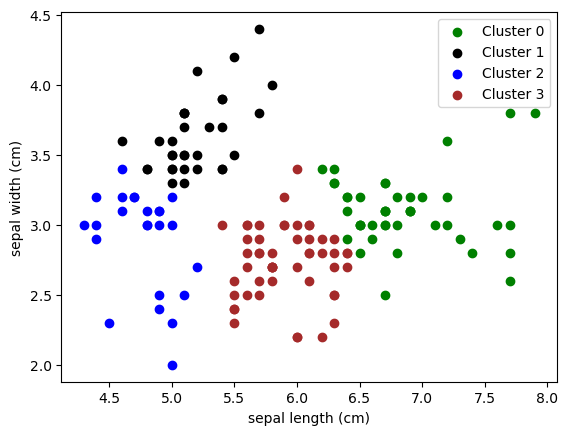

In [37]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='black', label='Cluster 1')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', label='Cluster 2')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='brown', label='Cluster 3')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\manpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

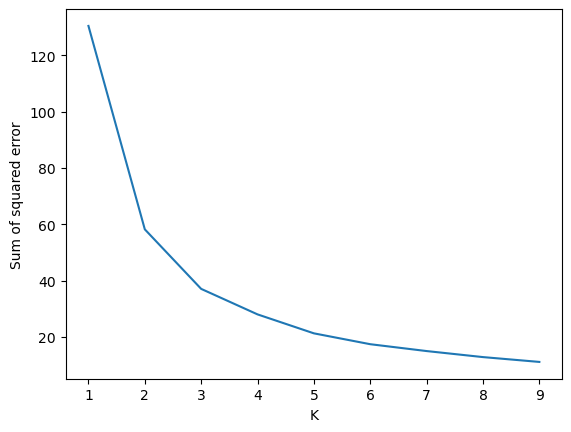

In [38]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)